<a href="https://colab.research.google.com/github/USHIERU/Minkowski-Bouligand-dimension/blob/master/Minkowski_Bouligand_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import copy
import numpy as np

class MinkowskiBouligandDimension:

    def __init__(self, img):
        self.img = copy.deepcopy(img)

    def test(self):
        print("OK")

    def is_diferent(self, crop_img):
        auxPix = np.array([255, 255, 255])

        for pixels in crop_img:
            for pixel in pixels:
                if((pixel != auxPix).all()):
                    return True
        return False


    def get_data(self, exponente, height, width):
        img = copy.deepcopy(self.img)
        floatlWidth = width / exponente
        integerWidth = integerlHeight = int(floatlWidth)

        auxWidth = integerWidth
        auxHeight = integerlHeight

        posX = 0
        posY = 0

        boxesTouched = 0

        while((posY + auxHeight) <= height):
            posX = 0
            while((posX + auxWidth) <= width):
                crop_img = self.img[posY:posY + auxHeight, posX:posX + auxWidth]

                if(self.is_diferent(crop_img)):
                    boxesTouched += 1
                    cv2.rectangle(img, (posX, posY), (posX + auxWidth, posY + auxHeight), (0, 0, 0), thickness = -1)
                else:
                    cv2.rectangle(img, (posX, posY), (posX + auxWidth, posY + auxHeight), (0, 0, 0), thickness = 1)

                posX += auxWidth
            posY += auxHeight

        cv2.putText(img, "Total Squares: %s" % (exponente**2), (20, height - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(img, "Squares Touched: %s" % (boxesTouched), (20, height - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        return boxesTouched, img


    def paint_grid(self, exponente, height, width):
        img = copy.deepcopy(self.img)
        floatlWidth = width / exponente
        integerWidth = integerlHeight = int(floatlWidth)

        auxWidth = integerWidth
        auxHeight = integerlHeight

        posX = 0
        posY = 0

        while((posY + auxHeight) <= height):
            posX = 0
            while((posX + auxWidth) <= width):
                cv2.rectangle(img, (posX, posY), (posX + auxWidth, posY + auxHeight), (0, 0, 0), thickness = 1)
                posX += auxWidth
            posY += auxHeight

        return img

    def get_img(self):
        return self.img

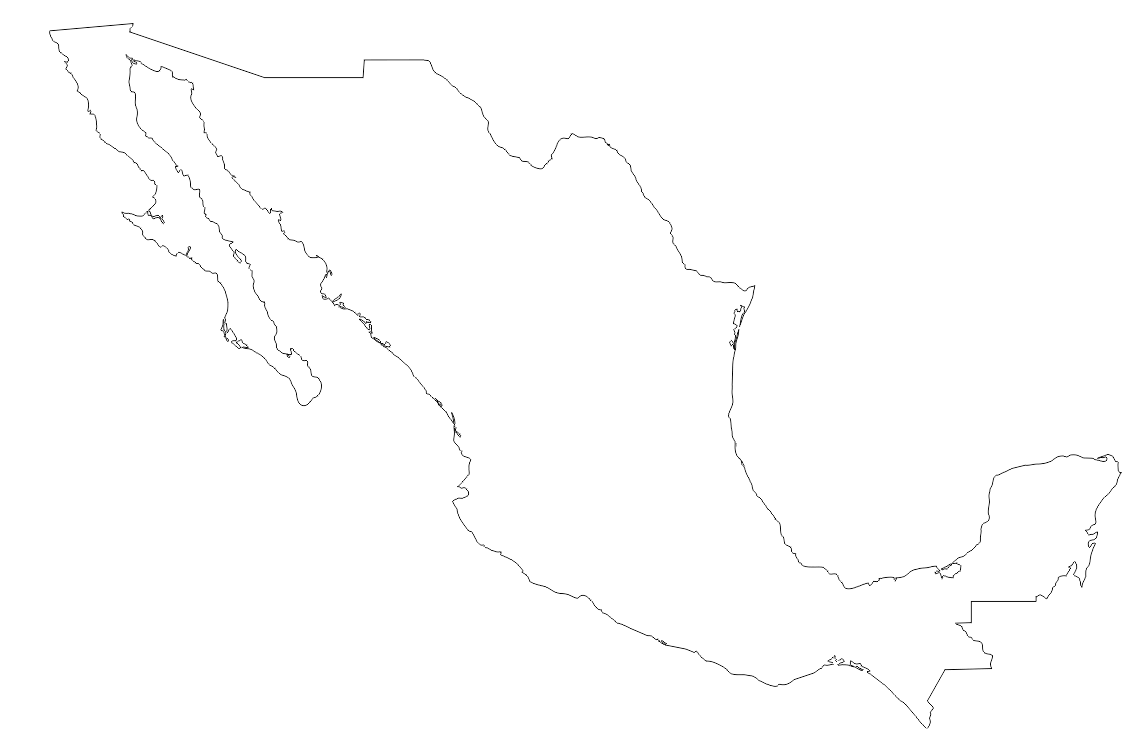

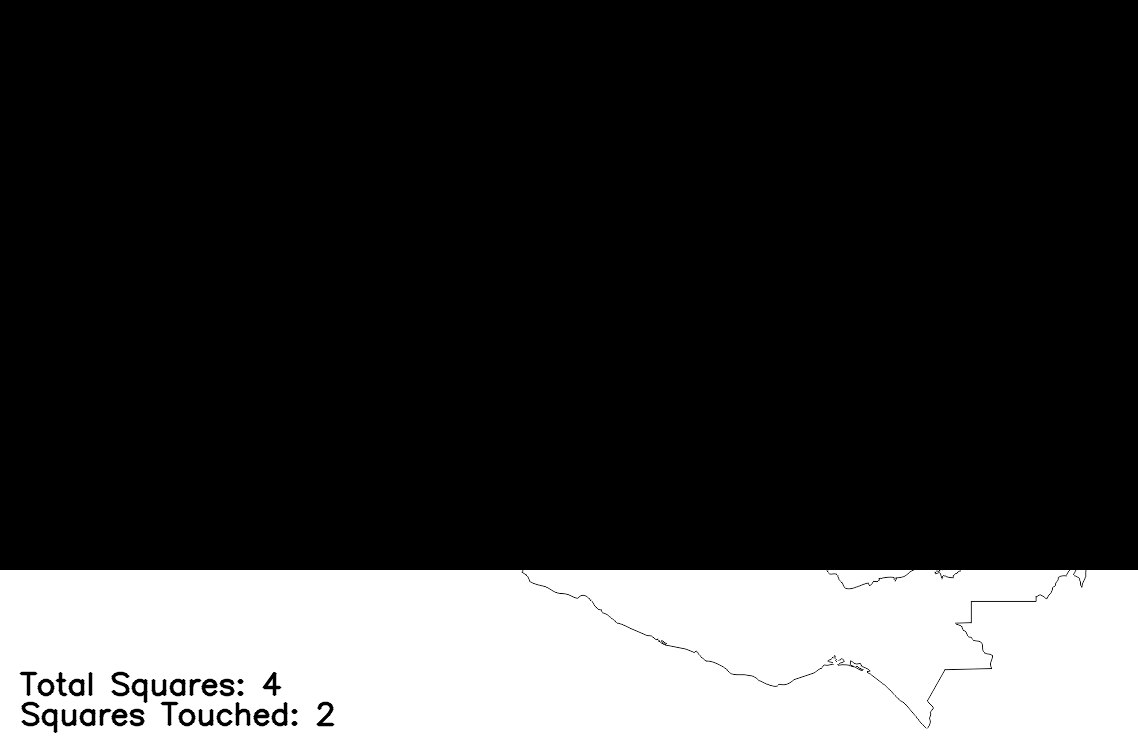

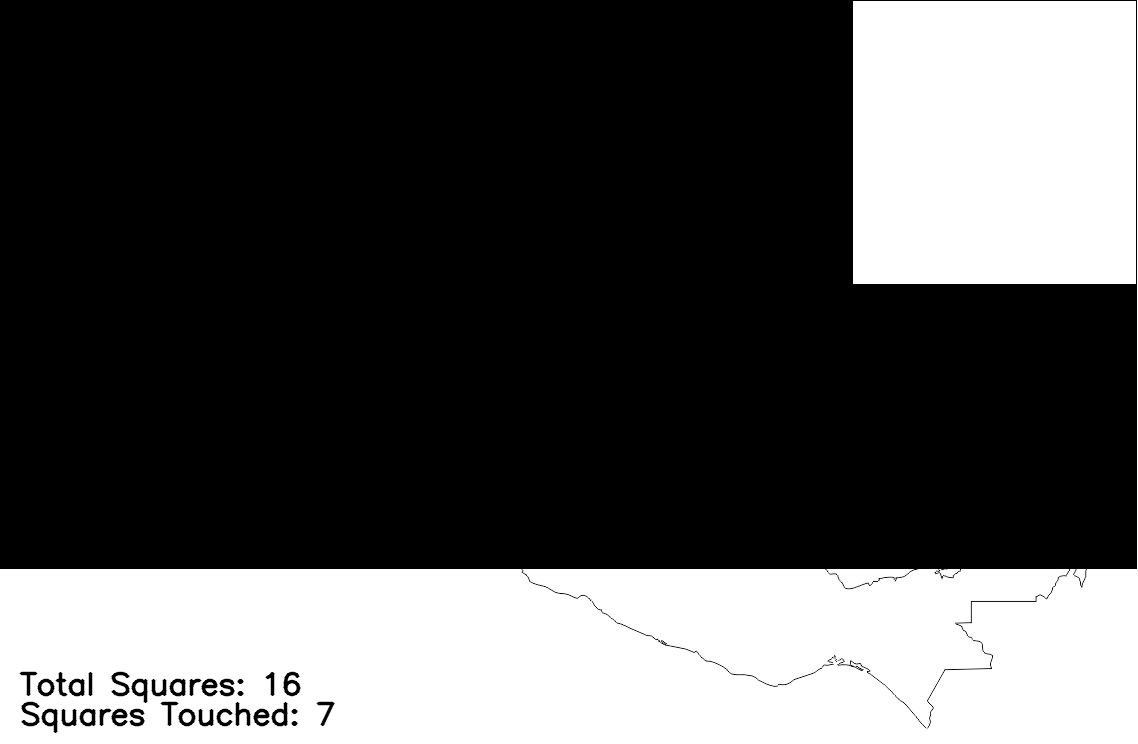

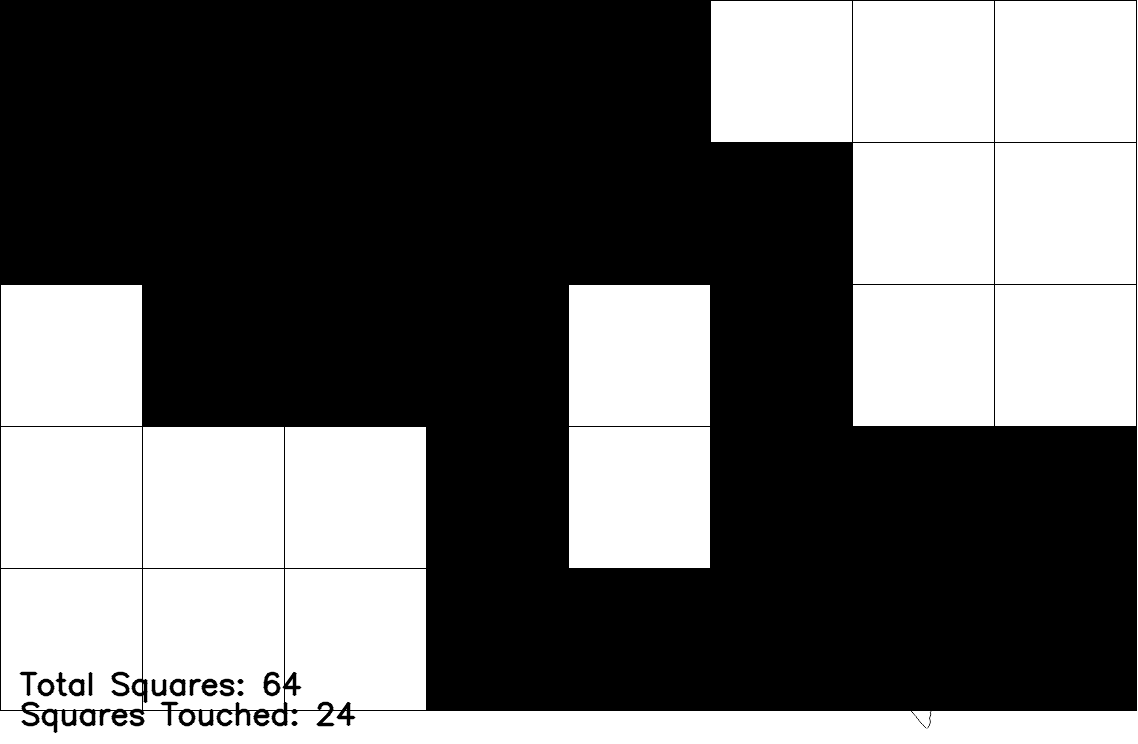

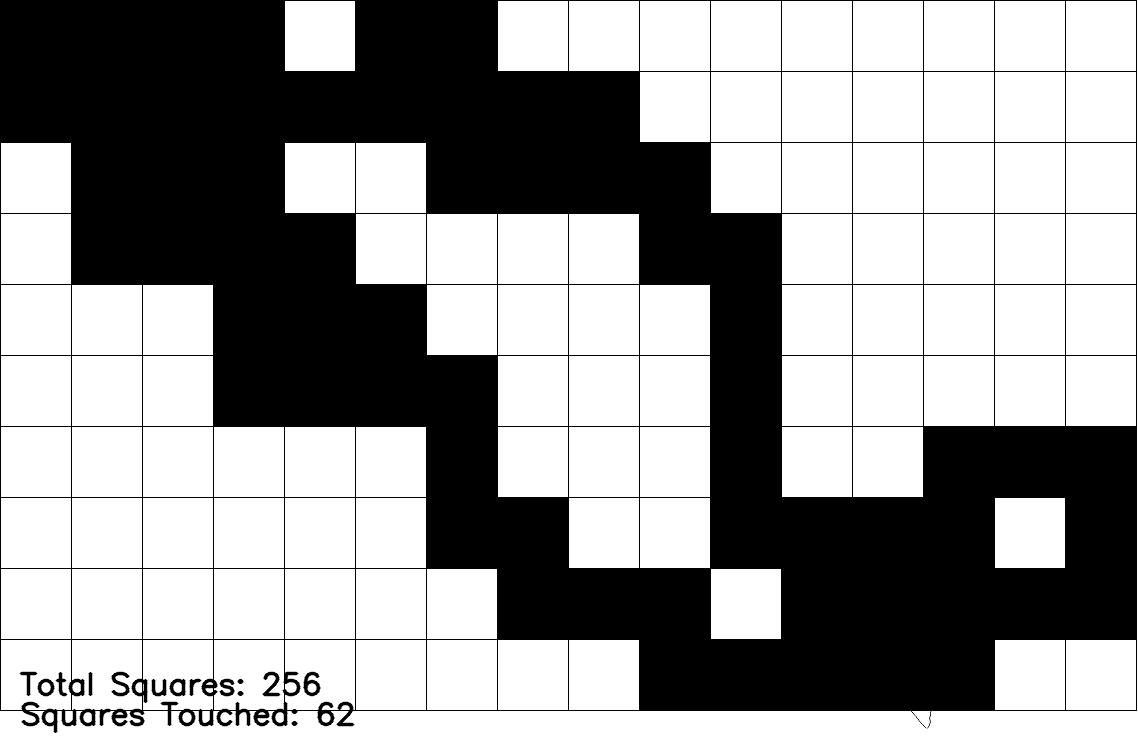

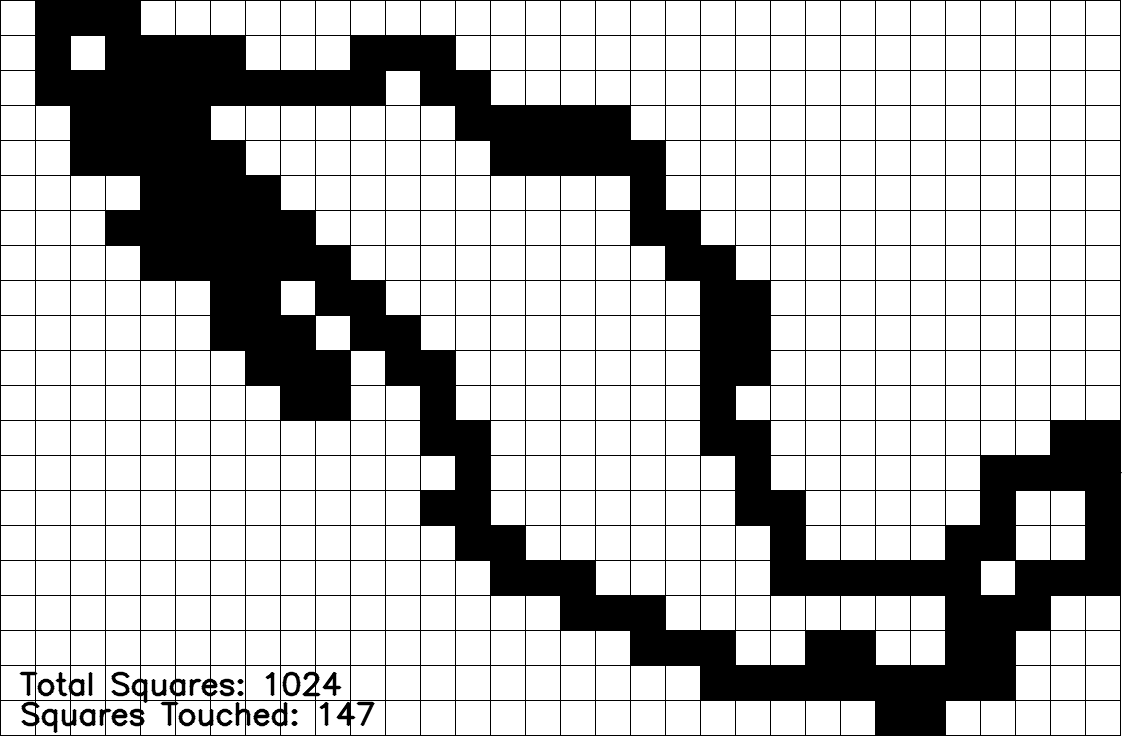

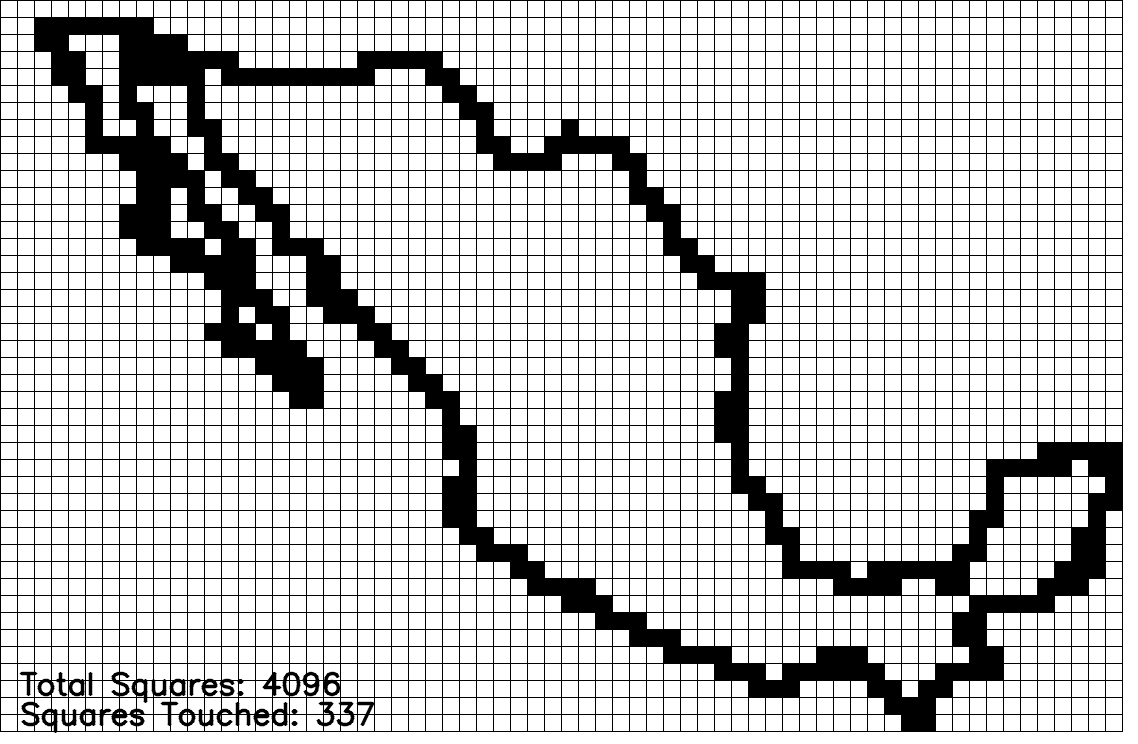

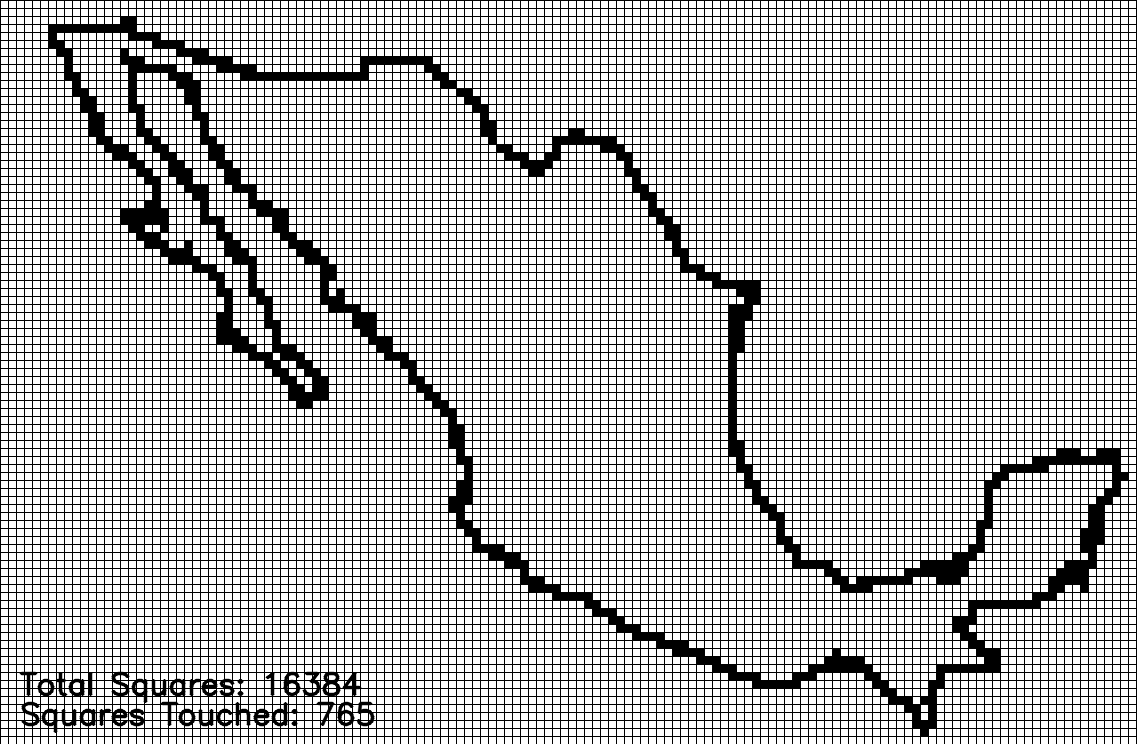

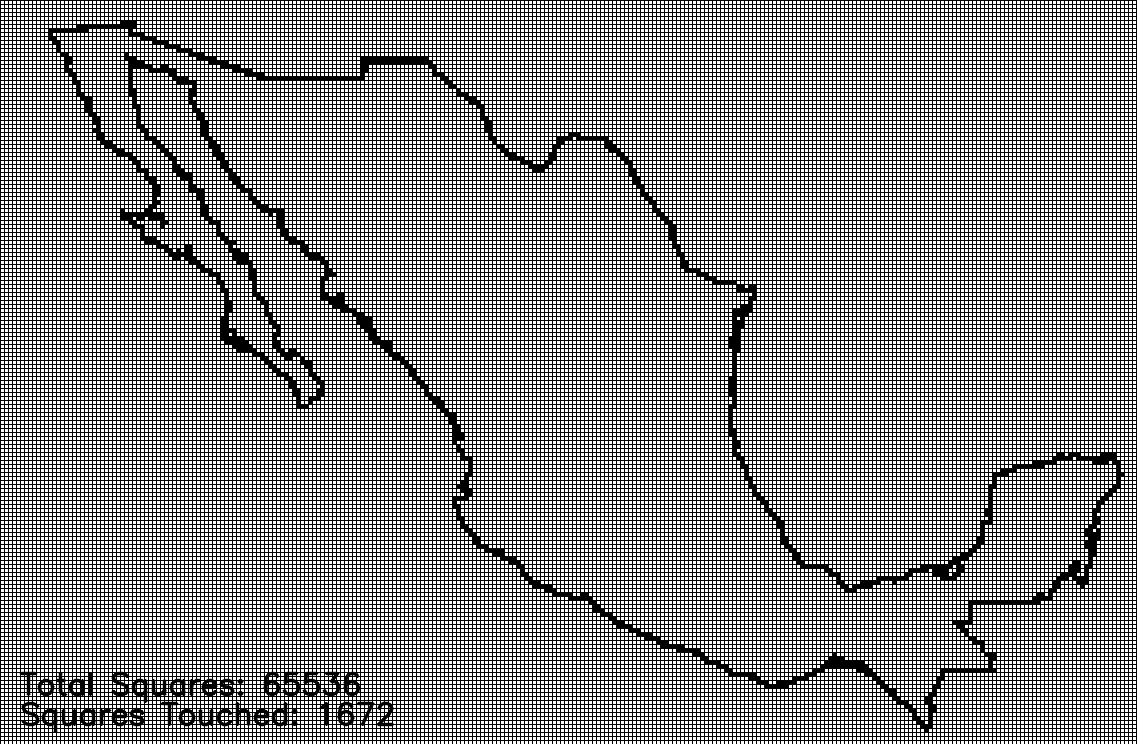

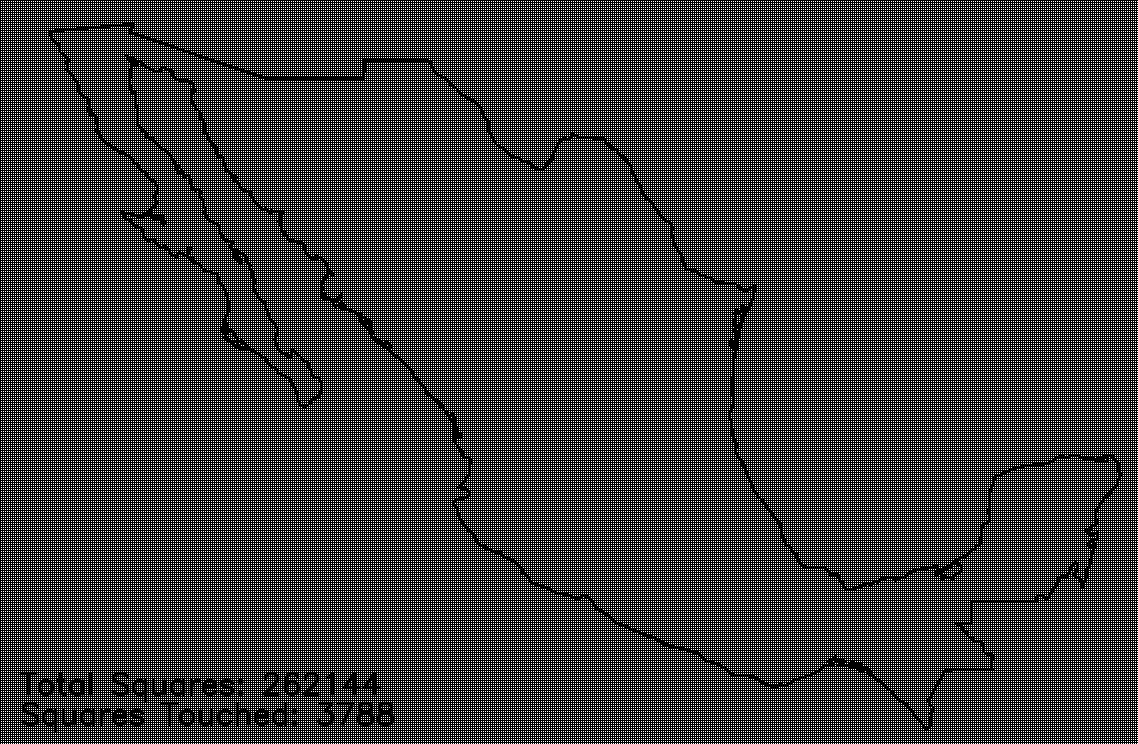

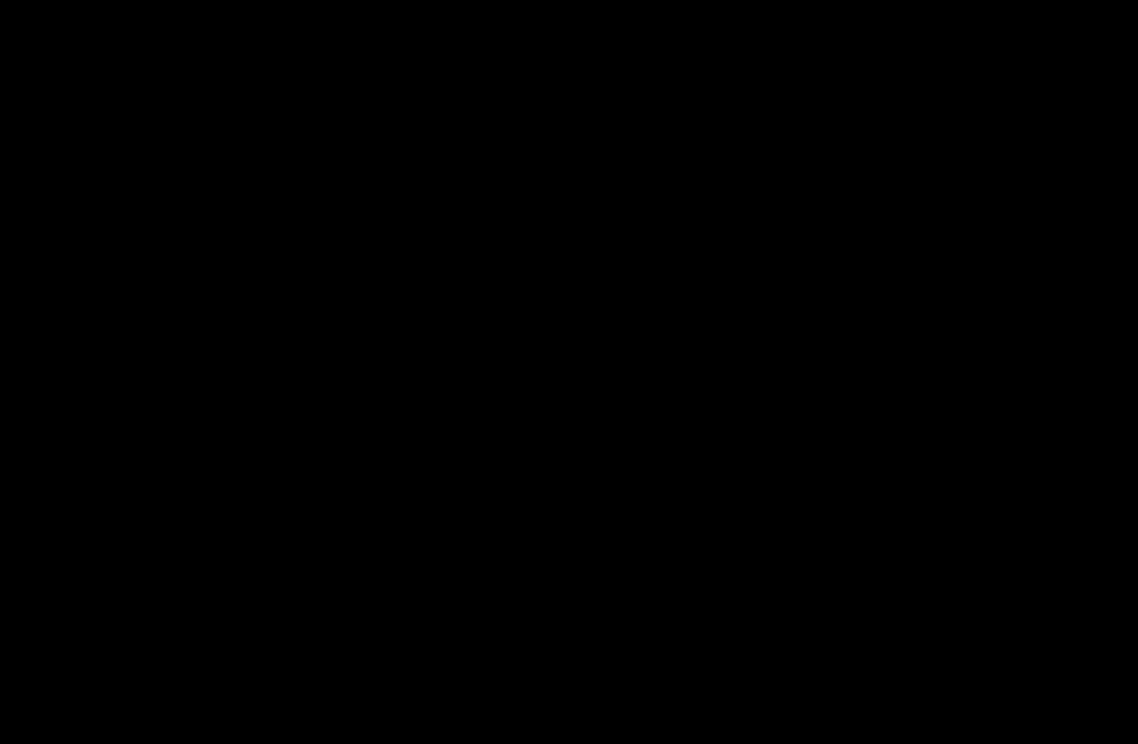

img: mexico 1.png
Boxes Touched: 2
Total boxes: 4
log(N): 0.6931471805599453
log(x): 1.3862943611198906
------------------------------
img: mexico 2.png
Boxes Touched: 7
Total boxes: 16
log(N): 1.9459101490553132
log(x): 2.772588722239781
------------------------------
img: mexico 3.png
Boxes Touched: 24
Total boxes: 64
log(N): 3.1780538303479458
log(x): 4.1588830833596715
------------------------------
img: mexico 4.png
Boxes Touched: 62
Total boxes: 256
log(N): 4.127134385045092
log(x): 5.545177444479562
------------------------------
img: mexico 5.png
Boxes Touched: 147
Total boxes: 1024
log(N): 4.990432586778736
log(x): 6.931471805599453
------------------------------
img: mexico 6.png
Boxes Touched: 337
Total boxes: 4096
log(N): 5.820082930352362
log(x): 8.317766166719343
------------------------------
img: mexico 7.png
Boxes Touched: 765
Total boxes: 16384
log(N): 6.639875833826536
log(x): 9.704060527839234
------------------------------
img: mexico 8.png
Boxes Touched: 1672
Tota

In [21]:
import cv2
from google.colab.patches import cv2_imshow
import math
import uuid
import urllib.request

def url_to_image(url):
  
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	return image

if __name__ == "__main__":
    name = "mexico.png"
    img = url_to_image('https://raw.githubusercontent.com/USHIERU/Minkowski-Bouligand-dimension/f2c4784593220a2139dc38f4cf9882370eb5b4b9/resources/mexico.png')

    exponente = 2
    limite = 1200

    resultados = []
    minkowskiBouligandDimension = MinkowskiBouligandDimension(img)
    height, width, _ = img.shape
    
    i = 1

    cv2_imshow(img)
    while(exponente < limite):
        boxesTouched, newImage = minkowskiBouligandDimension.get_data(exponente, height, width)
        resultados.append((exponente ** 2, boxesTouched, "%s %s.png" % (name[0: name.index(".")], i)))
        exponente *= 2
        i += 1
        cv2_imshow(newImage)
      
    n = np.array([])
    x = np.array([])
    
    

    for resultado in resultados:
        logn = math.log(resultado[1])
        logx = math.log(resultado[0])
        n = np.append(n, logn)
        x = np.append(x, logx)
        

        print("img: %s\nBoxes Touched: %s\nTotal boxes: %s\nlog(N): %s\nlog(x): %s\n------------------------------" % (resultado[2], resultado[1], resultado[0], logn, logx))

    coeffs = np.polyfit(n, x, 1)
    print(x)
    print(n)
    print(f'La dimensión fractal es {coeffs[0]}')

     
